In [3]:
#19/11/2021
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [4]:
# FUNCIONES
def histo(data):
    """
    grafica histogramas
    
    data: dataframe
    """
    n=data['Nombre municipio'].unique() #variable con datos unicos de municipios
    plt.title(f"Hist {str(n)}")
    data['Estado'].hist(color='k')   
    plt.show()
def Fecha(data,tex,dia,mes,year):
    """
    Filtra fechas 
    data: dataframe
    tex: cadena
    dia: int
    mes: int
    año: int
    """
    Ndat=len(data)
    print(dia)
    for i in range(Ndat):
        data[dia].iloc[i] =data[tex].iloc[i].day #para agregar dia
        data[mes].iloc[i]= data[tex].iloc[i].month#para agregar mes 
        data[year].iloc[i]=data[tex].iloc[i].year #para agregar año
        
    return data

def Graph(data,time,txt):
    """
    Grafica
    data: dataframe
    time: int
    txt: cadena
    """
    # Cuenta el número de casos por fecha o las fechas que se repiten
    freq = data[time].value_counts()
    freq=freq.sort_index()
    # colores del grafico
    c=['b','r','y','g']
    k=np.random.randint(4) # el color sale de maner aleatoria 
    lab=time.split()
    lab=lab[-1]
    # Grafica
    plt.figure(figsize=(20,10)) #tamaño
    plt.grid()  #malla 
    plt.title(txt)#titulo
    plt.plot(freq,'--*',color=c[k],label=lab) #especificacionesde grafico
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    return np.sum(freq)

#no se como agregar "if __name__=="__main__": en jupyter, no me funciona igual que en spyder  "

In [6]:
df= pd.read_csv("C:/Users/cfzap/OneDrive/Documentos/Datos/COVID-19_Colombia.csv")   # Se importan los datos  

In [7]:
df.head()  # Se visualizan las primeras 5 filas 

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


In [51]:
df.columns  # ver columnas 
dpt=df['Nombre departamento'].unique()  # ver los diferentes departamentos 
dpt

array(['BOGOTA', 'VALLE', 'ANTIOQUIA', 'CARTAGENA', 'HUILA', 'META',
       'RISARALDA', 'NORTE SANTANDER', 'CALDAS', 'CUNDINAMARCA',
       'BARRANQUILLA', 'SANTANDER', 'QUINDIO', 'TOLIMA', 'CAUCA',
       'STA MARTA D.E.', 'CESAR', 'SAN ANDRES', 'CASANARE', 'NARIÑO',
       'ATLANTICO', 'BOYACA', 'CORDOBA', 'BOLIVAR', 'SUCRE', 'MAGDALENA',
       'GUAJIRA', 'CHOCO', 'AMAZONAS', 'CAQUETA', 'PUTUMAYO', 'ARAUCA',
       'VAUPES', 'GUAINIA', 'VICHADA', 'GUAVIARE', 'Tolima', 'Caldas'],
      dtype=object)

In [52]:
df_m=df['Nombre departamento']=='VICHADA'  # busca  'VICHADA' en columna nombre departamento
df_f = df[df_m]  # Se crea un df para el 'VICHADA' con la busqueda anterior  
df_f.shape  # Dimension
df_f

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
25659,29/5/2020 0:00:00,25700,29/5/2020 0:00:00,99,VICHADA,99001,PUERTO CARREÑO,20,1,M,...,NaN,NaN,Recuperado,NaN,NaN,29/5/2020 0:00:00,7/6/2020 0:00:00,PCR,6.0,NaN
186185,18/7/2020 0:00:00,186226,15/7/2020 0:00:00,99,VICHADA,99524,LA PRIMAVERA,78,1,F,...,NaN,NaN,Recuperado,15/7/2020 0:00:00,NaN,17/7/2020 0:00:00,1/8/2020 0:00:00,PCR,5.0,NaN
345513,5/8/2020 0:00:00,345554,22/7/2020 0:00:00,99,VICHADA,99001,PUERTO CARREÑO,19,1,M,...,NaN,NaN,Recuperado,NaN,NaN,2/8/2020 0:00:00,14/8/2020 0:00:00,Tiempo,6.0,NaN
345514,5/8/2020 0:00:00,345555,22/7/2020 0:00:00,99,VICHADA,99001,PUERTO CARREÑO,20,1,M,...,NaN,NaN,Recuperado,NaN,NaN,2/8/2020 0:00:00,14/8/2020 0:00:00,Tiempo,6.0,NaN
345515,5/8/2020 0:00:00,345556,22/7/2020 0:00:00,99,VICHADA,99001,PUERTO CARREÑO,19,1,M,...,NaN,NaN,Recuperado,NaN,NaN,2/8/2020 0:00:00,6/2/2021 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992510,25/10/2021 0:00:00,4992551,9/10/2021 0:00:00,99,VICHADA,99001,PUERTO CARREÑO,41,1,M,...,NaN,NaN,Recuperado,5/10/2021 0:00:00,NaN,20/10/2021 0:00:00,26/10/2021 0:00:00,Tiempo,6.0,NaN
4995028,27/10/2021 0:00:00,4995069,25/10/2021 0:00:00,99,VICHADA,99773,CUMARIBO,29,1,F,...,NaN,NaN,Activo,22/10/2021 0:00:00,NaN,25/10/2021 0:00:00,NaN,NaN,1.0,SABANITA
4998060,29/10/2021 0:00:00,4998101,27/10/2021 0:00:00,99,VICHADA,99773,CUMARIBO,33,1,M,...,NaN,NaN,Activo,21/10/2021 0:00:00,NaN,27/10/2021 0:00:00,NaN,NaN,NaN,NaN
4999648,30/10/2021 0:00:00,4999689,19/10/2021 0:00:00,99,VICHADA,99001,PUERTO CARREÑO,27,1,F,...,NaN,NaN,Activo,19/10/2021 0:00:00,NaN,25/10/2021 0:00:00,NaN,NaN,NaN,NaN


In [53]:
df_f2=df_f
df_f.sort_index() #organiza el df
df_f = df_f.sort_values(by=('Nombre municipio'))  #organiza por numbre de municipio
df_f.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
5002337,31/10/2021 0:00:00,5002378,14/10/2021 0:00:00,99,VICHADA,99773,CUMARIBO,34,1,M,...,NaN,NaN,Recuperado,7/10/2021 0:00:00,NaN,25/10/2021 0:00:00,1/11/2021 0:00:00,Tiempo,NaN,NaN
757898,19/9/2020 0:00:00,757939,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,18,1,F,...,NaN,NaN,Recuperado,NaN,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
757895,19/9/2020 0:00:00,757936,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,19,1,M,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
757878,19/9/2020 0:00:00,757919,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,26,1,F,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
757867,19/9/2020 0:00:00,757908,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,31,1,F,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN


In [54]:
df_f['Ubicación del caso'] = df_f['Ubicación del caso'].replace({np.NaN:0})  # Se hace sero la columna que desee
#cambia los NaN por ceros en Ubicación del caso, debido a que de esta manera no me afacta si luego quiero trabajar con el numero total de municipios afectados
df_f.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

In [55]:
df_f =  df_f.reset_index() #reinicia el index
df_f

,index,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,5002337,31/10/2021 0:00:00,5002378,14/10/2021 0:00:00,99,VICHADA,99773,CUMARIBO,34,1,...,NaN,NaN,Recuperado,7/10/2021 0:00:00,NaN,25/10/2021 0:00:00,1/11/2021 0:00:00,Tiempo,NaN,NaN
1,757898,19/9/2020 0:00:00,757939,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,18,1,...,NaN,NaN,Recuperado,NaN,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
2,757895,19/9/2020 0:00:00,757936,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,19,1,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
3,757878,19/9/2020 0:00:00,757919,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,26,1,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
4,757867,19/9/2020 0:00:00,757908,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,31,1,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,4061596,25/6/2021 0:00:00,4061637,23/6/2021 0:00:00,99,VICHADA,99624,SANTA ROSALIA,23,1,...,NaN,NaN,Recuperado,20/6/2021 0:00:00,NaN,23/6/2021 0:00:00,6/7/2021 0:00:00,Tiempo,6.0,NaN
2952,4454494,9/7/2021 0:00:00,4454535,5/7/2021 0:00:00,99,VICHADA,99624,SANTA ROSALIA,31,1,...,NaN,NaN,Recuperado,3/7/2021 0:00:00,NaN,5/7/2021 0:00:00,17/7/2021 0:00:00,Tiempo,6.0,NaN
2953,4843184,10/8/2021 0:00:00,4843225,29/7/2021 0:00:00,99,VICHADA,99624,SANTA ROSALIA,29,1,...,NaN,NaN,Recuperado,22/7/2021 0:00:00,NaN,9/8/2021 0:00:00,11/8/2021 0:00:00,Tiempo,6.0,NaN
2954,4454495,9/7/2021 0:00:00,4454536,5/7/2021 0:00:00,99,VICHADA,99624,SANTA ROSALIA,30,1,...,NaN,NaN,Recuperado,30/6/2021 0:00:00,NaN,5/7/2021 0:00:00,14/7/2021 0:00:00,Tiempo,6.0,NaN


In [56]:
df_f=df_f.drop(['index'],axis=1)  # elimina la columna index

In [57]:
df_f

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,31/10/2021 0:00:00,5002378,14/10/2021 0:00:00,99,VICHADA,99773,CUMARIBO,34,1,M,...,NaN,NaN,Recuperado,7/10/2021 0:00:00,NaN,25/10/2021 0:00:00,1/11/2021 0:00:00,Tiempo,NaN,NaN
1,19/9/2020 0:00:00,757939,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,18,1,F,...,NaN,NaN,Recuperado,NaN,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
2,19/9/2020 0:00:00,757936,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,19,1,M,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
3,19/9/2020 0:00:00,757919,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,26,1,F,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
4,19/9/2020 0:00:00,757908,6/9/2020 0:00:00,99,VICHADA,99773,CUMARIBO,31,1,F,...,NaN,NaN,Recuperado,30/8/2020 0:00:00,NaN,17/9/2020 0:00:00,23/9/2020 0:00:00,Tiempo,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,25/6/2021 0:00:00,4061637,23/6/2021 0:00:00,99,VICHADA,99624,SANTA ROSALIA,23,1,M,...,NaN,NaN,Recuperado,20/6/2021 0:00:00,NaN,23/6/2021 0:00:00,6/7/2021 0:00:00,Tiempo,6.0,NaN
2952,9/7/2021 0:00:00,4454535,5/7/2021 0:00:00,99,VICHADA,99624,SANTA ROSALIA,31,1,F,...,NaN,NaN,Recuperado,3/7/2021 0:00:00,NaN,5/7/2021 0:00:00,17/7/2021 0:00:00,Tiempo,6.0,NaN
2953,10/8/2021 0:00:00,4843225,29/7/2021 0:00:00,99,VICHADA,99624,SANTA ROSALIA,29,1,M,...,NaN,NaN,Recuperado,22/7/2021 0:00:00,NaN,9/8/2021 0:00:00,11/8/2021 0:00:00,Tiempo,6.0,NaN
2954,9/7/2021 0:00:00,4454536,5/7/2021 0:00:00,99,VICHADA,99624,SANTA ROSALIA,30,1,M,...,NaN,NaN,Recuperado,30/6/2021 0:00:00,NaN,5/7/2021 0:00:00,14/7/2021 0:00:00,Tiempo,6.0,NaN


In [58]:
df_f.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

In [59]:
df_n =df_f.columns  # columnas de df 
n=len(df_n) #tamaño de df_n
    
filterdate = list(filter(lambda x: x[0].lower() in 'f', df_n))  # trae columnas que comienzan con F, para usar fechas 

print(filterdate)
indices=[]
for i in filterdate:
        df_f[i]=pd.to_datetime(df_f[i])  # pasa a datatime
        f=i.split()   # separa cadena por palabras para nombre de colmna 
        indices.append(f[-1])  # trae la ultima palabra del nombre de la columna, para usarla luego para nombrar columnas nuevas

indices

['fecha reporte web', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación']


['web', 'notificación', 'síntomas', 'muerte', 'diagnóstico', 'recuperación']

In [60]:
pos=np.array([2, 7, 24, 28, 31, 36])  # posiciones de columnas que voy a usar 

In [61]:
pos
indices

['web', 'notificación', 'síntomas', 'muerte', 'diagnóstico', 'recuperación']

In [62]:
Num_d=len(df_f)
dias=[]
meses=[]
years=[]
for i in range(len(indices)):
    loc=int(pos[i])
    print(loc)
    t=indices[i]
    df_f.insert(loc, f"dia {t}", 0)  #cadena con formato para crear columnas con numbre esperado a partir de las palabras encontradas con anterioridad
    df_f.insert(loc+1, f"mes {t}", 0)
    df_f.insert(loc+2, f"año {t}", 0)

2
7
24
28
31
36


In [63]:
df_f

,fecha reporte web,ID de caso,dia web,mes web,año web,Fecha de notificación,Código DIVIPOLA departamento,dia notificación,mes notificación,año notificación,...,dia diagnóstico,mes diagnóstico,año diagnóstico,Fecha de recuperación,Tipo de recuperación,dia recuperación,mes recuperación,año recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2021-10-31,5002378,0,0,0,2021-10-14,99,0,0,0,...,0,0,0,2021-01-11,Tiempo,0,0,0,NaN,NaN
1,2020-09-19,757939,0,0,0,2020-06-09,99,0,0,0,...,0,0,0,2020-09-23,Tiempo,0,0,0,6.0,NaN
2,2020-09-19,757936,0,0,0,2020-06-09,99,0,0,0,...,0,0,0,2020-09-23,Tiempo,0,0,0,6.0,NaN
3,2020-09-19,757919,0,0,0,2020-06-09,99,0,0,0,...,0,0,0,2020-09-23,Tiempo,0,0,0,6.0,NaN
4,2020-09-19,757908,0,0,0,2020-06-09,99,0,0,0,...,0,0,0,2020-09-23,Tiempo,0,0,0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2021-06-25,4061637,0,0,0,2021-06-23,99,0,0,0,...,0,0,0,2021-06-07,Tiempo,0,0,0,6.0,NaN
2952,2021-09-07,4454535,0,0,0,2021-05-07,99,0,0,0,...,0,0,0,2021-07-17,Tiempo,0,0,0,6.0,NaN
2953,2021-10-08,4843225,0,0,0,2021-07-29,99,0,0,0,...,0,0,0,2021-11-08,Tiempo,0,0,0,6.0,NaN
2954,2021-09-07,4454536,0,0,0,2021-05-07,99,0,0,0,...,0,0,0,2021-07-14,Tiempo,0,0,0,6.0,NaN


In [64]:
df_c= df_f.columns
df_c
filtrod = list(filter(lambda x: x[0].lower() in 'd', df_c))  # encuentra los que comienzan con "d", "m "
filtrom = list(filter(lambda x: x[0].lower() in 'm', df_c))  #y "a", con esto se buscan las columnas que necesito para agregar datos
filtroa = list(filter(lambda x: x[0].lower() in 'a', df_c))
filtroa

['año web',
 'año notificación',
 'año síntomas',
 'año muerte',
 'año diagnóstico',
 'año recuperación']

In [65]:
# agregar informacion a las columnas creadas 
for i in range(len(filterdate)):
    df_f=Fecha(df_f,filterdate[i],filtrod[i],filtrom[i],filtroa[i])  

dia web


C:\Users\belky\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


dia notificación
dia síntomas
dia muerte
dia diagnóstico
dia recuperación


In [66]:
df_f

,fecha reporte web,ID de caso,dia web,mes web,año web,Fecha de notificación,Código DIVIPOLA departamento,dia notificación,mes notificación,año notificación,...,dia diagnóstico,mes diagnóstico,año diagnóstico,Fecha de recuperación,Tipo de recuperación,dia recuperación,mes recuperación,año recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2021-10-31,5002378,31,10,2021,2021-10-14,99,14,10,2021,...,25,10,2021,2021-01-11,Tiempo,11.0,1.0,2021.0,NaN,NaN
1,2020-09-19,757939,19,9,2020,2020-06-09,99,9,6,2020,...,17,9,2020,2020-09-23,Tiempo,23.0,9.0,2020.0,6.0,NaN
2,2020-09-19,757936,19,9,2020,2020-06-09,99,9,6,2020,...,17,9,2020,2020-09-23,Tiempo,23.0,9.0,2020.0,6.0,NaN
3,2020-09-19,757919,19,9,2020,2020-06-09,99,9,6,2020,...,17,9,2020,2020-09-23,Tiempo,23.0,9.0,2020.0,6.0,NaN
4,2020-09-19,757908,19,9,2020,2020-06-09,99,9,6,2020,...,17,9,2020,2020-09-23,Tiempo,23.0,9.0,2020.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2021-06-25,4061637,25,6,2021,2021-06-23,99,23,6,2021,...,23,6,2021,2021-06-07,Tiempo,7.0,6.0,2021.0,6.0,NaN
2952,2021-09-07,4454535,7,9,2021,2021-05-07,99,7,5,2021,...,7,5,2021,2021-07-17,Tiempo,17.0,7.0,2021.0,6.0,NaN
2953,2021-10-08,4843225,8,10,2021,2021-07-29,99,29,7,2021,...,8,9,2021,2021-11-08,Tiempo,8.0,11.0,2021.0,6.0,NaN
2954,2021-09-07,4454536,7,9,2021,2021-05-07,99,7,5,2021,...,7,5,2021,2021-07-14,Tiempo,14.0,7.0,2021.0,6.0,NaN


In [67]:
F=df_f

In [68]:
F=F.sort_values(by=('Fecha de diagnóstico'))#organiza por fecha 
F=F.reset_index()#reorganiza el index
F.head()

,index,fecha reporte web,ID de caso,dia web,mes web,año web,Fecha de notificación,Código DIVIPOLA departamento,dia notificación,mes notificación,...,dia diagnóstico,mes diagnóstico,año diagnóstico,Fecha de recuperación,Tipo de recuperación,dia recuperación,mes recuperación,año recuperación,Pertenencia étnica,Nombre del grupo étnico
0,1885,2020-02-09,629607,9,2,2020,2020-08-21,99,21,8,...,9,1,2020,2020-12-18,PCR,18.0,12.0,2020.0,6.0,NaN
1,1884,2020-02-09,629606,9,2,2020,2020-08-21,99,21,8,...,9,1,2020,2020-07-09,Tiempo,9.0,7.0,2020.0,1.0,EMBERA
2,185,2020-03-10,842844,10,3,2020,2020-09-23,99,23,9,...,10,1,2020,2020-10-13,Tiempo,13.0,10.0,2020.0,6.0,NaN
3,151,2020-03-10,842037,10,3,2020,2020-09-28,99,28,9,...,10,1,2020,2020-10-16,Tiempo,16.0,10.0,2020.0,6.0,NaN
4,152,2020-03-10,841597,10,3,2020,2020-01-10,99,10,1,...,10,1,2020,2020-10-19,Tiempo,19.0,10.0,2020.0,6.0,NaN


In [69]:
F['Estado'].unique()
F['Estado']=F['Estado'].replace({'leve':'Leve'}) #leve esta escrito de dos maneras, se organiza para que quede solo una forma
F['Estado'].unique()

array(['Leve', 'Fallecido', nan, 'Moderado'], dtype=object)

In [70]:
mun=F['Nombre municipio'].unique() #municipios
MUNI=[]  
a=0
b=0
for i in mun:
  
    muni=F['Nombre municipio']==i
    O=F[muni]  
    MUNI.append(O)   #agrega municipios a lista MUNI
    k=len(MUNI[b]) # contador de casos
    a+=k            #contador
    print(b,k,a) # Casos por municipio
    b+=1            #contador de contador 
     
MUNI[1]
a
n_mun=len(mun)
print("*"*10) #informacion sobre casos por cada lugar, los numeros de 0 a 3 son los municipios 
print(n_mun,a)
F.columns
MUNI[1] 

0 2436 2436
1 234 2670
2 152 2822
3 134 2956
**********
4 2956


,index,fecha reporte web,ID de caso,dia web,mes web,año web,Fecha de notificación,Código DIVIPOLA departamento,dia notificación,mes notificación,...,dia diagnóstico,mes diagnóstico,año diagnóstico,Fecha de recuperación,Tipo de recuperación,dia recuperación,mes recuperación,año recuperación,Pertenencia étnica,Nombre del grupo étnico
2,185,2020-03-10,842844,10,3,2020,2020-09-23,99,23,9,...,10,1,2020,2020-10-13,Tiempo,13.0,10.0,2020.0,6.0,NaN
3,151,2020-03-10,842037,10,3,2020,2020-09-28,99,28,9,...,10,1,2020,2020-10-16,Tiempo,16.0,10.0,2020.0,6.0,NaN
4,152,2020-03-10,841597,10,3,2020,2020-01-10,99,10,1,...,10,1,2020,2020-10-19,Tiempo,19.0,10.0,2020.0,6.0,NaN
6,188,2020-03-10,842360,10,3,2020,2020-09-26,99,26,9,...,10,1,2020,2020-10-16,Tiempo,16.0,10.0,2020.0,6.0,NaN
11,150,2020-03-10,842051,10,3,2020,2020-09-28,99,28,9,...,10,1,2020,2020-10-16,Tiempo,16.0,10.0,2020.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,194,2021-10-27,4995069,27,10,2021,2021-10-25,99,25,10,...,25,10,2021,NaT,NaN,NaN,NaN,NaN,1.0,SABANITA
2893,0,2021-10-31,5002378,31,10,2021,2021-10-14,99,14,10,...,25,10,2021,2021-01-11,Tiempo,11.0,1.0,2021.0,NaN,NaN
2894,221,2021-10-29,4998101,29,10,2021,2021-10-27,99,27,10,...,27,10,2021,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2909,121,2021-06-13,3733043,13,6,2021,2021-05-31,99,31,5,...,6,11,2021,2021-07-08,Tiempo,8.0,7.0,2021.0,6.0,NaN


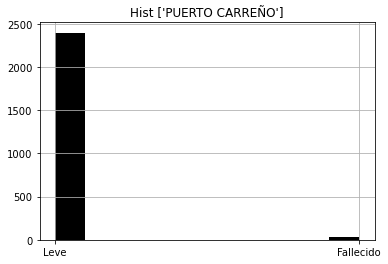

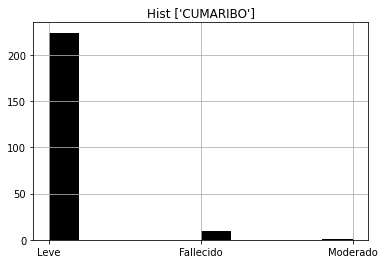

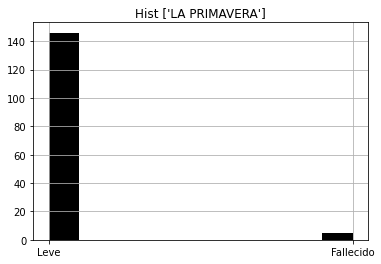

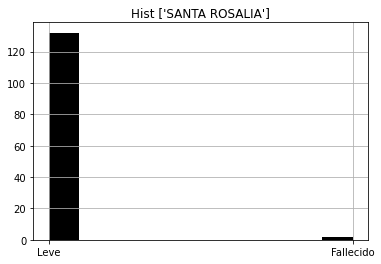

In [78]:
# 6
for i in range(len(MUNI)): #ciclo para los n municipios usando funcion histo
    histo(MUNI[i])

In [72]:
df_MF=F['Sexo']=='F'  # busca en la columna sexo a las mujeres 
sex_f = F[df_MF]  # Se crea un df para mujeres
sex_f['Sexo'].unique   #trae solo los tipos de sexo
df_Mm=F['Sexo']=='M' # busca en la columna sexo a los hombres 
sex_m = F[df_Mm]  # Se crea un df para hombres
sex_m['Sexo'].unique

<bound method Series.unique of 2       M
5       M
6       M
8       M
9       M
       ..
2944    M
2945    M
2946    M
2948    M
2953    M
Name: Sexo, Length: 1693, dtype: object>

In [79]:
fechas= list(pd.to_datetime(sex_f["Fecha de muerte"].unique())) #fechas mujeres 
fechas.sort() #organiza 

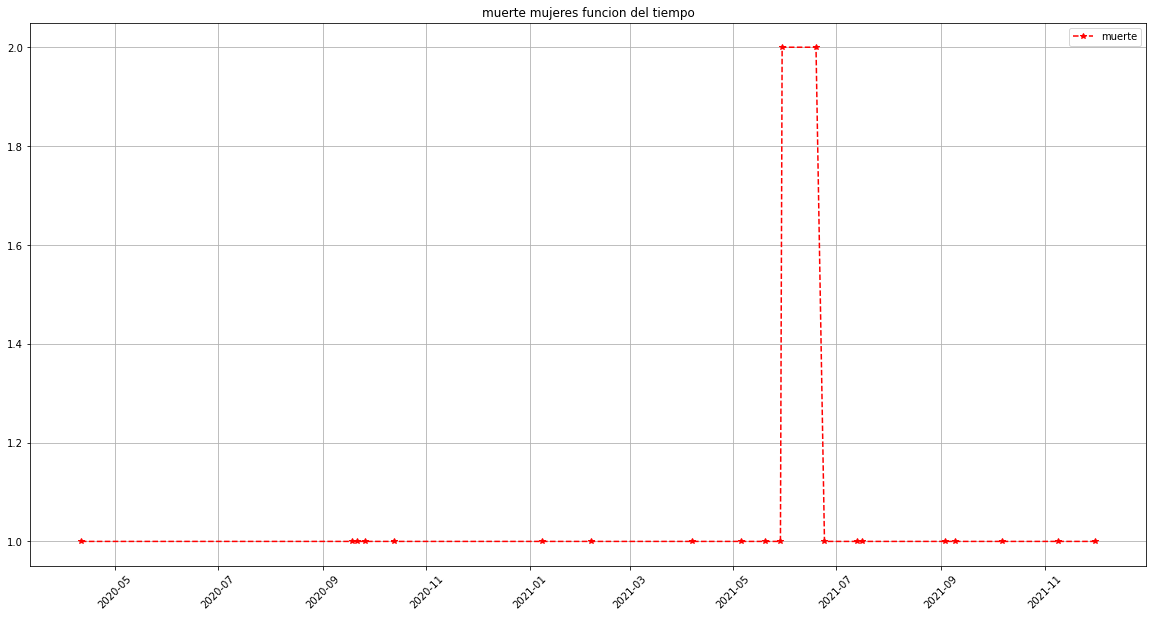

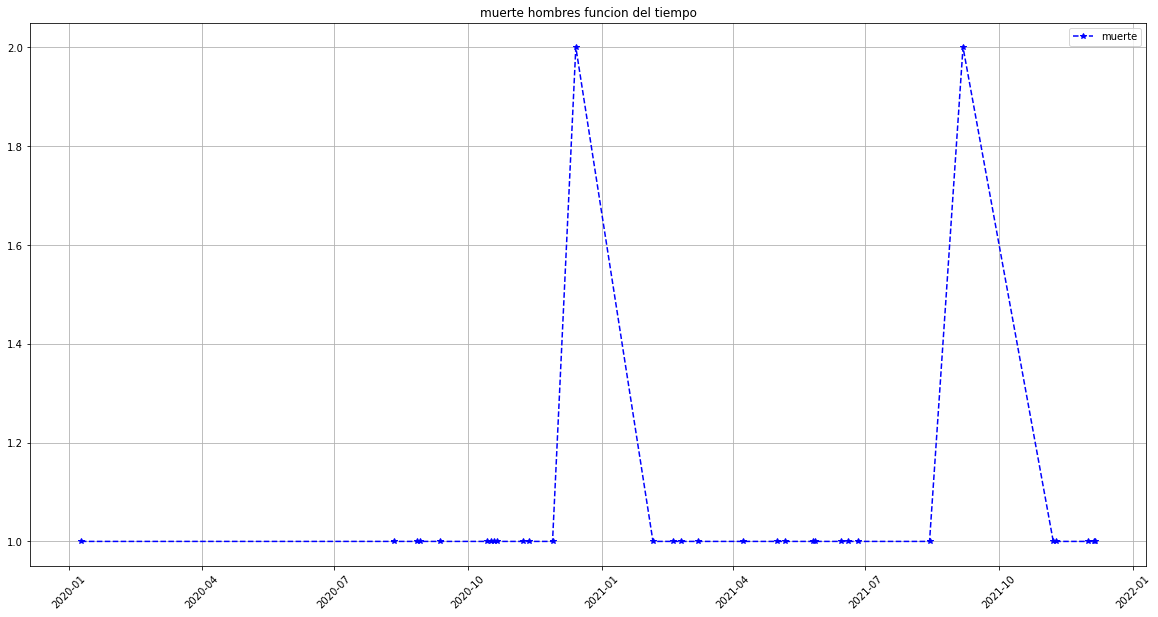

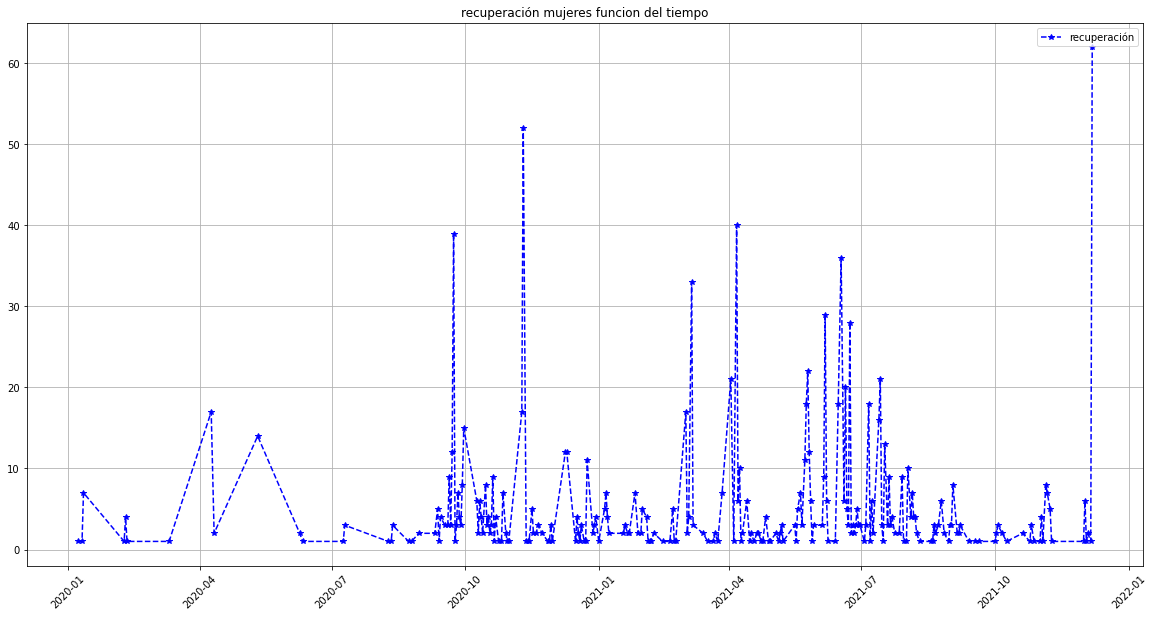

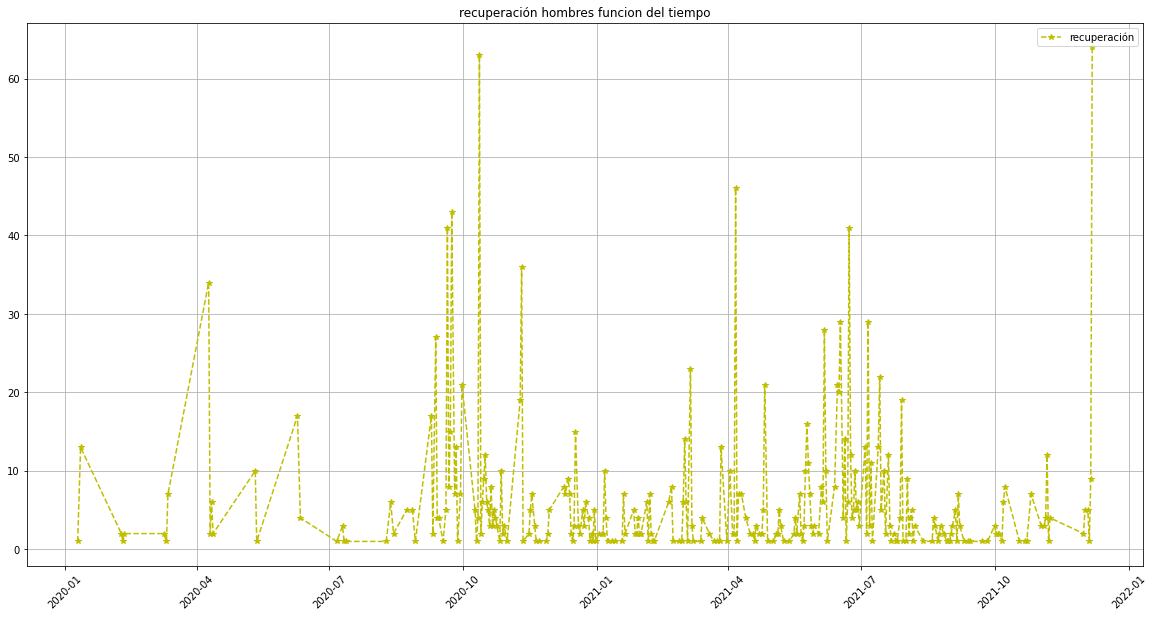

1657

In [80]:
Graph(sex_f,'Fecha de muerte',"muerte mujeres funcion del tiempo")
Graph(sex_m,'Fecha de muerte',"muerte hombres funcion del tiempo")
Graph(sex_f,'Fecha de recuperación',"recuperación mujeres funcion del tiempo")
Graph(sex_m,'Fecha de recuperación',"recuperación hombres funcion del tiempo")


In [ ]:
F.to_csv("Covid_Vichada.csv")